In [10]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os

In [11]:
hist_data = {'braidwood':"./electricity_markets/PJM_braidwood/",
              'davis_besse':"./electricity_markets/PJM_davis_besse/", 
              #'houston':"./electricity_markets/ERCOT_houston/", 
              'cooper': "./electricity_markets/SPP_cooper/",
              'prairie_island_1': "./electricity_markets/MISO_prairie_island_1/",
              'stp_1': "./electricity_markets/ERCOT_stp_1/"}



In [12]:
dico ={}
df = pd.DataFrame()
for case, folder in hist_data.items():
  files_names = os.listdir(folder)
  files_names = [folder+f for f in files_names if f.endswith(".csv") and 'historical' not in f]
  files_names.sort()
  prices = []
  for f in files_names: 
    prices.append(pd.read_csv(f)['price'].to_numpy())
  temp_df = pd.DataFrame()
  temp_df[case] = np.concatenate(prices)
  df = pd.concat([df, temp_df], axis=1) 
print(df)

       braidwood  davis_besse  cooper  prairie_island_1  stp_1
0          25.17        25.17   22.44             23.23  21.14
1          22.13        22.13   19.13             22.22  20.61
2          21.15        21.15   21.26             21.88  20.22
3          21.12        21.12   21.44             21.80  20.63
4          20.57        20.57   20.39             21.71  21.02
...          ...          ...     ...               ...    ...
87595      28.52        28.52     NaN               NaN  26.63
87596      26.37        26.37     NaN               NaN  23.91
87597      24.87        24.87     NaN               NaN  23.85
87598      24.80        24.80     NaN               NaN  24.76
87599      22.59        22.59     NaN               NaN  23.95

[87600 rows x 5 columns]


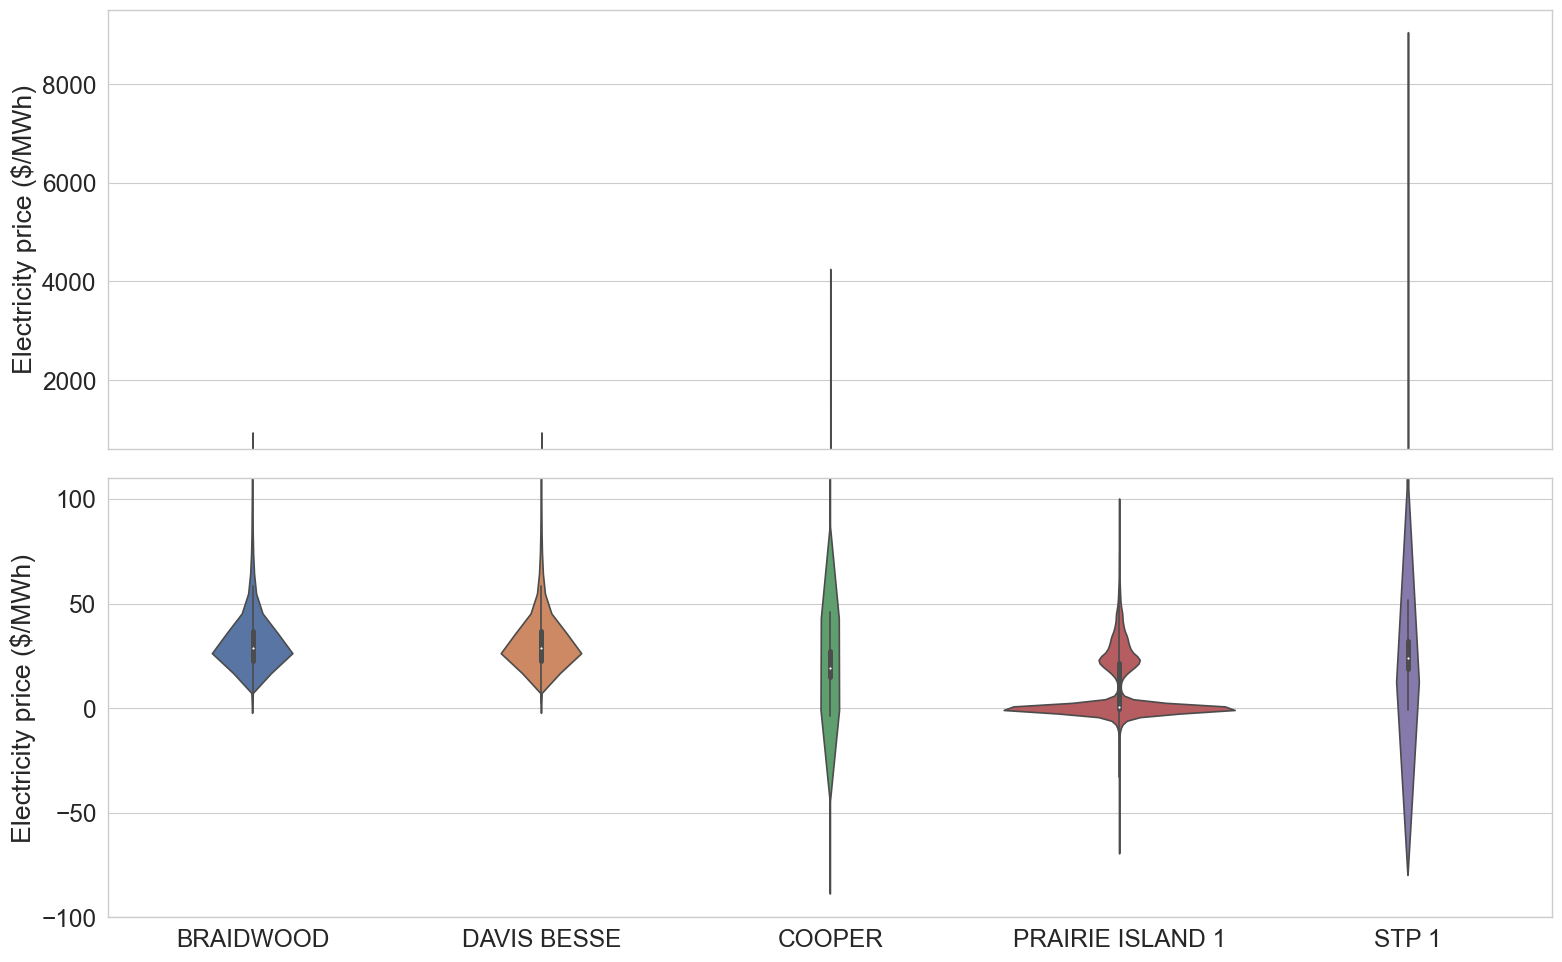

In [14]:
sns.set_theme(style='whitegrid')
sns.set_context("paper", font_scale=2)
fig, axes = plt.subplots(2,1,figsize=(16,10), sharex=True)
re_dict = {}
for case in hist_data.keys():
  re_dict[case] = " ".join(case.split('_')).upper()
df.rename(re_dict, inplace=True, axis=1)

# Outliers
sns.violinplot(ax = axes[0], data = df)
axes[0].set_ylabel('Electricity price ($/MWh)')
axes[0].set_ylim(bottom=600)
# Base up to $500/MWh
sns.violinplot(ax = axes[1], data = df)
axes[1].set_ylabel('Electricity price ($/MWh)')
axes[1].set_ylim(top=110, bottom=-100)


fig.tight_layout()
fig.savefig('markets_comparison.png')